In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configurations of the plots created

In [2]:
# Read the data

df = pd.read_csv(r'C:\Users\shyam\Downloads\movies.csv')

In [3]:
# Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Looking at data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Filling NA values with the value 0

df = df.fillna(0)

In [7]:
# Changing the data types of the columns from float to integer

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
# Creating a new column (year released)

df['yearcorrect'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,Octo
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,Apri
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,Octo


In [9]:
# Setting to display all the rows instead of just a few

#pd.set_option('display.max_rows', None)

In [10]:
# Sorting values in ascending order by gross

df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,Janu
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,Apri
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,Apri
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,Janu


In [11]:
# remove duplicates

df['company'].drop_duplicates()

5445       Twentieth Century Fox
7445              Marvel Studios
6663                   Lucasfilm
7480        Walt Disney Pictures
6653          Universal Pictures
                  ...           
1635               Charlie Mopic
1631          Double Helix Films
1617     Gibraltar Entertainment
1601    Budapest Stúdió Vállalat
7667                 PK 65 Films
Name: company, Length: 2386, dtype: object

In [12]:
# Budget will have a high correlation
# Company will have a high correlation

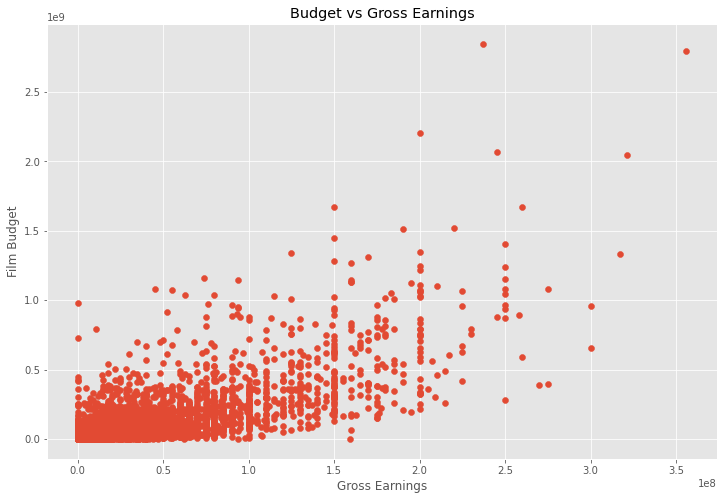

In [13]:
# Scatter plot with budget and gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

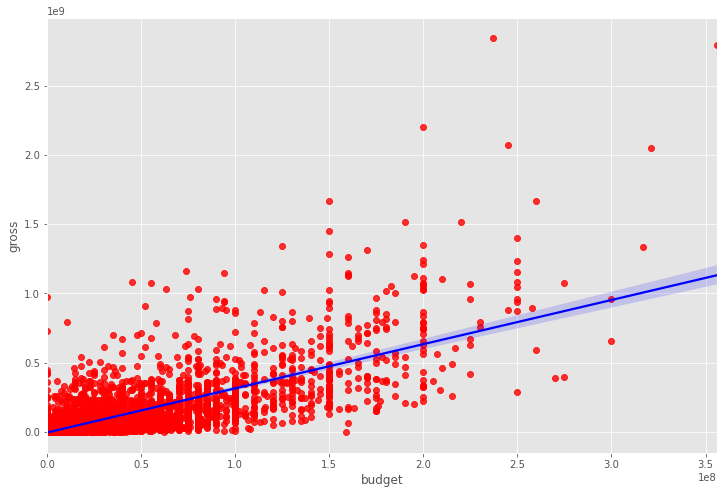

In [14]:
# Regression plot
# Plotting budget vs gross 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})

In [15]:
# Looking at correlations in figures
# Pearson method

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [16]:
# Kendall method

df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [17]:
# Spearman method

df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


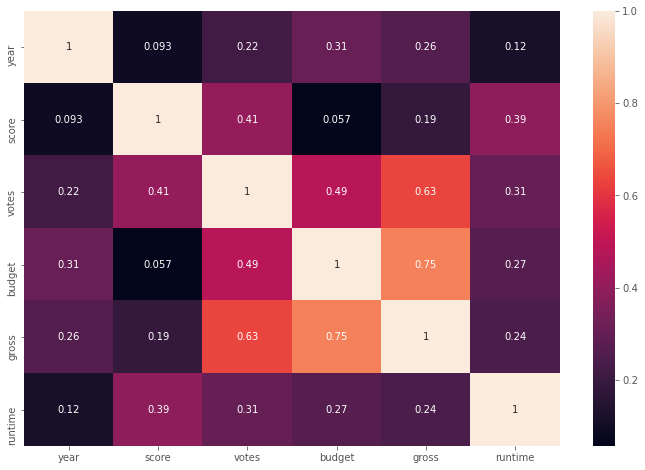

In [18]:
# Creating a correlation matrix

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title = ('Correlation matrix for numeric features')
plt.xlabel = ('Movie features')
plt.ylabel = ('Movie features')
plt.show()

In [19]:
# Converting string values to numeric
# Mainly for converting Company names to numeric

df_numerized = df

for col_name in df_numerized. columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,11
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,9
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,11
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,11
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1278,4.5,274.0,117,83,2798,56,0,0,1160,92.0,13
1614,1745,7,10,1989,56,5.2,1300.0,1033,1744,167,55,0,0,147,85.0,9
1606,2691,7,8,1989,258,6.0,2900.0,2743,947,1196,7,0,0,2238,89.0,9
1601,3836,0,4,1989,1161,7.1,1500.0,1105,1697,682,19,0,0,505,104.0,13


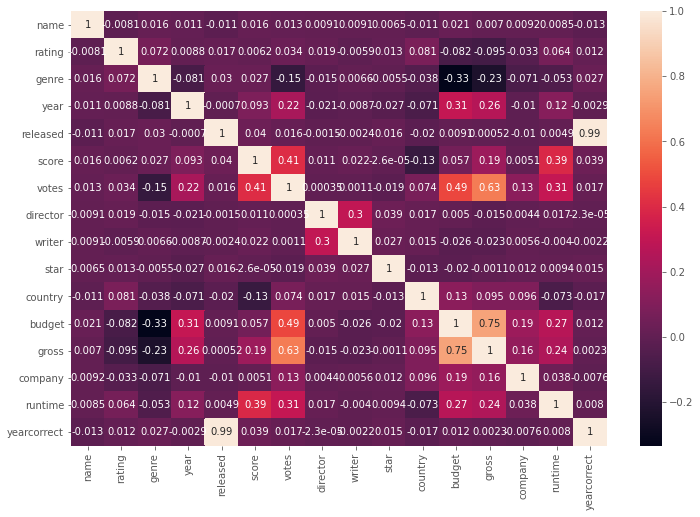

In [20]:
# Creating a correlation matrix using the new numerized data 

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title = ('Correlation matrix for numeric features')
plt.xlabel = ('Movie features')
plt.ylabel = ('Movie features')
plt.show()

In [21]:
# Looking at the corralation without the correlation matrix

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,-0.013132
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.012429
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,0.027305
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,-0.002885
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,0.994590
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.038923
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.016978
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.000023
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.002235
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,0.015330


In [22]:
# Ranking fields with the highest correlation

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
                              ...   
yearcorrect  budget         0.011545
             gross          0.002322
             company       -0.007622
             runtime        0.007999
             yearcorrect    1.000000
Length: 256, dtype: float64

In [23]:
# Sorting the correlation in pairs in descending order (highest on top)

sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

name     name       1.000000
rating   rating     1.000000
runtime  runtime    1.000000
company  company    1.000000
gross    gross      1.000000
                      ...   
genre    votes     -0.145296
         gross     -0.234297
gross    genre     -0.234297
budget   genre     -0.334021
genre    budget    -0.334021
Length: 256, dtype: float64

In [24]:
# Filtering high correlations greater than 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
released     yearcorrect    0.994590
yearcorrect  released       0.994590
budget       gross          0.750157
gross        budget         0.750157
votes        gross          0.632870
gross        votes          0.632870
dtype: float64